In [186]:
from numpy import *
from matplotlib import pyplot as plt
import operator

## prepare data set and make plot

run code below.

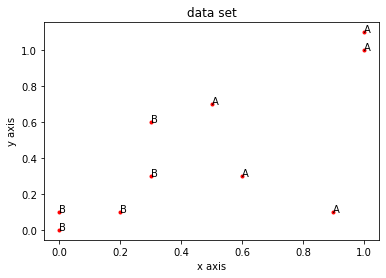

In [215]:
dset = array([
    [1,1],
    [1,1.1],
    [0,0],
    [0,0.1],
    [0.3,0.6],
    [0.5,0.7],
    [0.2,0.1],
    [0.6,0.3],
    [0.9,0.1],
    [0.3,0.3],
])
labels = ['A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B']
dset

plt.title('data set')
plt.xlabel('x axis')
plt.ylabel('y axis')
xaxis = dset[:,0]
yasix = dset[:,1]
plt.plot(xaxis, yasix, 'r.')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yasix[i], labels[i])
plt.show()


In [430]:
'%dMB' % (50*10**4 * 11 * 2 / 10**6)

'11MB'

## kNN algorithm

### config kNN args

In [220]:
k=3  # numbers of nearest neighbor
p = array([0.5, 0.8])   # sample for predicated

In [221]:
dist_list = []
for i in range(len(dset)):
    # 欧式距离公式
    distance = sqrt(sum((dset[i]-p)**2))
    dist_list.append([distance, labels[i]])

dist_list = array(dist_list)
sorted_dist_list = dist_list[dist_list[:,0].argsort()]

tmp = {}
for i in range(k):
    item = sorted_dist_list[i]
    dis = item[0]
    label = item[1]
    tmp[label] = tmp.get(label, 0) + 1

sorted_kNN_set = sorted(tmp.items(), key=operator.itemgetter(1), reverse=True)

print('nearest neighbor set:', sorted_kNN_set)
print('nearest neighbor label: %s, count: %d' % sorted_kNN_set[0])


nearest neighbor set: [('A', 2), ('B', 1)]
nearest neighbor label: A, count: 2


## Iris data

In [49]:
from pandas import read_csv

In [55]:
iris_set = array(read_csv('./iris.data'))





## Digits recognize

In [298]:
import os

## function #img2vector()
transfer digit txt img to vector

In [294]:
def img2vector(file):
    vector = []
    f = open(file)
    for line in f.readlines():
        for char in line:
            if char == '1':
                vector.append(1)
            elif char == '0':
                vector.append(0)
    return vector

In [299]:
def walk(folder):
    for root, ds, fs in os.walk(folder):
        for file in fs:
            yield file

read training data from files and convert all to vectors

In [316]:
folder = './dataset/digits/trainingDigits/'
dset = []
labels = []
for file in walk(folder):
    path = os.path.join(folder, file)
    dset.append(array(img2vector(path)))
    label = file.split('.')[0].split('_')[0]
    labels.append(label)

read test data from files and convert all to vectors

In [364]:
k=20
test_folder = './dataset/digits/testDigits/'

test_vectors = []
test_labels = []
for file in walk(test_folder):
    test_vectors.append(img2vector(os.path.join(test_folder, file)))
    label = file.split('.')[0].split('_')[0]
    test_labels.append(label)

## 欧几里得距离公式

点 A $(x_{11},x_{21},...x_{n1})$

点 B $(x_{12},x_{22},...x_{n2})$

$n$ 表示向量维度

向量 A, B 的距离可表示为 $\sqrt{\sum_{i=0}^{n} {(x_{i2}-x_{i1})^2}}$

In [403]:
def kNN_digit_recognize(dset, labels, test_vector):
    dist_list = []
    for i in range(len(dset)):
        # 欧几里得距离公式
        sample = dset[i]
        distance = sqrt(sum((test_vector-sample)**2))
        dist_list.append([distance, labels[i]])

    dist_list = sorted(dist_list, key=operator.itemgetter(0))

    kNN_set = {}
    for item in array(dist_list)[:k, 1]:
        kNN_set[item] = kNN_set.get(item, 0) + 1

    return kNN_set

In [ ]:
total = 100  #  要测试的数据量
err_count = 0  # 识别错误的数量（计算错误率）

foreach test dataset and calculate error rate.

In [424]:
for i in range(total):
    idx = int(floor(random.rand() * len(test_vectors)))
    test_vector = test_vectors[idx]
    test_label = test_labels[idx]
    tmp = kNN_digit_recognize(dset, labels, test_vector)
    tmp = sorted(tmp.items(), key=operator.itemgetter(1), reverse=True)[0]
    label = tmp[0]
    neighbors = tmp[1]
    iserror = False
    if label != test_label:
        err_count = err_count + 1
        iserror = True
    print('%stest label: %s, recognize label: %s, match counts: %d' % ('error)' if iserror else '', test_label, label, neighbors))
    
print('error rate: %.4f' % (err_count / total))

test label: 9, recognize label: 9, match counts: 15
test label: 5, recognize label: 5, match counts: 20
test label: 0, recognize label: 0, match counts: 20
test label: 3, recognize label: 3, match counts: 20
test label: 7, recognize label: 7, match counts: 20
test label: 1, recognize label: 1, match counts: 19
test label: 4, recognize label: 4, match counts: 20
test label: 4, recognize label: 4, match counts: 20
test label: 6, recognize label: 6, match counts: 20
test label: 8, recognize label: 8, match counts: 20
test label: 5, recognize label: 5, match counts: 20
test label: 2, recognize label: 2, match counts: 20
test label: 6, recognize label: 6, match counts: 20
test label: 6, recognize label: 6, match counts: 20
test label: 0, recognize label: 0, match counts: 20
test label: 0, recognize label: 0, match counts: 20
test label: 8, recognize label: 8, match counts: 14
test label: 0, recognize label: 0, match counts: 20
test label: 9, recognize label: 9, match counts: 19
test label: 